# WeatherAPI
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

575

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
# Single API call to analyze JSON return

url = "https://api.openweathermap.org/data/2.5/weather?"
city = 'honolulu'
query_url = f"{url}appid={weather_api_key}&q={city}"
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

{'coord': {'lon': -157.8583, 'lat': 21.3069},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 300.44,
  'feels_like': 302.6,
  'temp_min': 298.97,
  'temp_max': 302.05,
  'pressure': 1016,
  'humidity': 71},
 'visibility': 10000,
 'wind': {'speed': 7.2, 'deg': 60, 'gust': 11.32},
 'clouds': {'all': 40},
 'dt': 1689999893,
 'sys': {'type': 1,
  'id': 7878,
  'country': 'US',
  'sunrise': 1689955222,
  'sunset': 1690002897},
 'timezone': -36000,
 'id': 5856195,
 'name': 'Honolulu',
 'cod': 200}

In [4]:
url = "https://api.openweathermap.org/data/2.5/weather?"

# Loop counter and total to display progress
count = 0
total_cities = len(cities)

# Timer counter to prevent API rate limitation
time_count = 0

# Storage list for values to store to dataframe
valid_cities = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Date and time of data access
now = datetime.now()
dt_string = now.strftime("%m/%d/%Y %H:%M")

print(f'date and time of openweathermap access: {dt_string}')
for city in cities:
    count += 1
    if time_count < 50:
        try:
            query_url = f"{url}appid={weather_api_key}&q={city}"
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()
            valid_cities.append(weather_json['name'])
            lat.append(weather_json['coord']['lat'])
            lng.append(weather_json['coord']['lon'])
            #convert temps from Kelvin to Fahrenheit
            max_temp.append(((weather_json['main']['temp_max'])-273.15) * 9/5 + 32)
            humidity.append(weather_json['main']['humidity'])
            cloudiness.append(weather_json['clouds']['all'])
            wind_speed.append(weather_json['wind']['speed'])
            country.append(weather_json['sys']['country'])
            date.append(weather_json['dt'])
            print(f'city #{count} of {total_cities}: {city} data processed')
        except:
            print(f'city #{count} of {total_cities}: {city} data unavailable')
        time_count += 1
    else:
        time.sleep(60)
        time_count = 0
        
city_data = pd.DataFrame({'City': valid_cities,
                          'Lat': lat,
                          'Long': lng,
                          'Max Temp': max_temp,
                          'Humidity': humidity,
                          'Cloudiness': cloudiness,
                          'Wind Speed': wind_speed,
                          'Country': country,
                          'Date': date})

date and time of openweathermap access: 07/21/2023 18:24
city #1 of 575: yellowknife data processed
city #2 of 575: bredasdorp data processed
city #3 of 575: albany data processed
city #4 of 575: blackmans bay data processed
city #5 of 575: port mathurin data processed
city #6 of 575: san antonio del estrecho data unavailable
city #7 of 575: college data processed
city #8 of 575: ushtobe data processed
city #9 of 575: papatowai data processed
city #10 of 575: kurmuk data processed
city #11 of 575: grytviken data processed
city #12 of 575: punta arenas data processed
city #13 of 575: saipan data processed
city #14 of 575: adamstown data processed
city #15 of 575: kodiak data processed
city #16 of 575: san luis de la loma data processed
city #17 of 575: zhmerynka data processed
city #18 of 575: taiohae data unavailable
city #19 of 575: geraldton data processed
city #20 of 575: tura data processed
city #21 of 575: gisborne data processed
city #22 of 575: port-aux-francais data processed
c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data.to_csv(output_data_file)

In [6]:
filepath = ('output_data/cities.csv')
city_data = pd.read_csv(filepath)
city_data

,Unnamed: 0,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Yellowknife,62.4560,-114.3525,72.122,37,100,2.57,CA,1689999637
1,1,Bredasdorp,-34.5322,20.0403,44.114,71,100,1.97,ZA,1689999895
2,2,Albany,42.6001,-73.9662,65.912,87,0,2.89,US,1689999896
3,3,Blackmans Bay,-43.0167,147.3167,59.126,72,88,1.88,AU,1689999897
4,4,Port Mathurin,-19.6833,63.4167,72.716,81,93,8.94,MU,1689999897
...,...,...,...,...,...,...,...,...,...,...
534,534,Lubango,-14.9172,13.4925,53.456,43,12,1.03,AO,1690001007
535,535,Mwinilunga,-11.7358,24.4293,58.298,56,37,2.37,ZM,1690001008
536,536,Rustenburg,-25.6676,27.2421,47.750,89,85,1.96,ZA,1690000747
537,537,Rām Dās,31.9661,74.9047,80.042,74,100,2.27,IN,1690001009


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

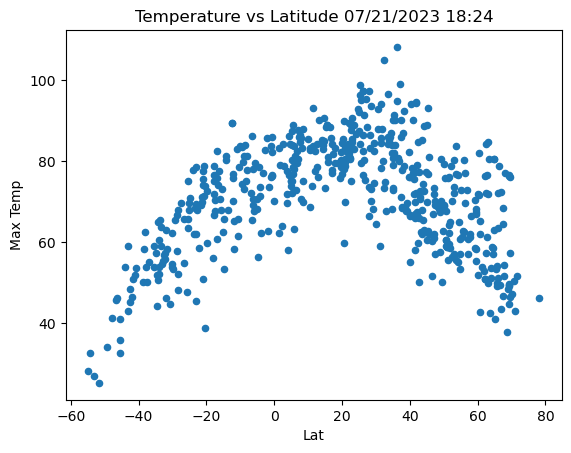

In [7]:
city_data.plot(kind='scatter', x='Lat', y='Max Temp', title=f'Temperature vs Latitude {dt_string}')
plt.savefig('output_data/temp_vs_lat.png')

## Latitude vs. Humidity Plot

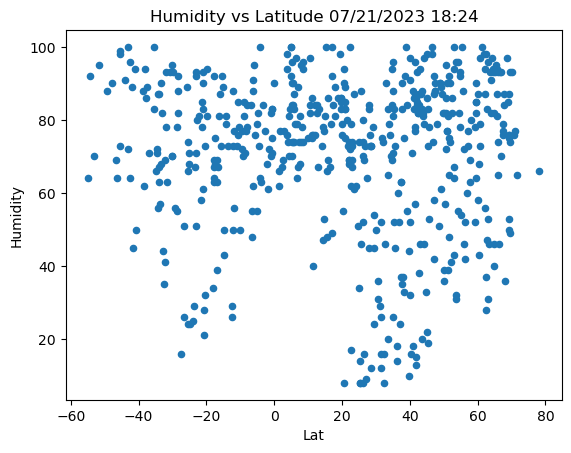

In [8]:
city_data.plot(kind='scatter', x='Lat', y='Humidity', title=f'Humidity vs Latitude {dt_string}')
plt.savefig('output_data/humidity_vs_lat.png')

## Latitude vs. Cloudiness Plot

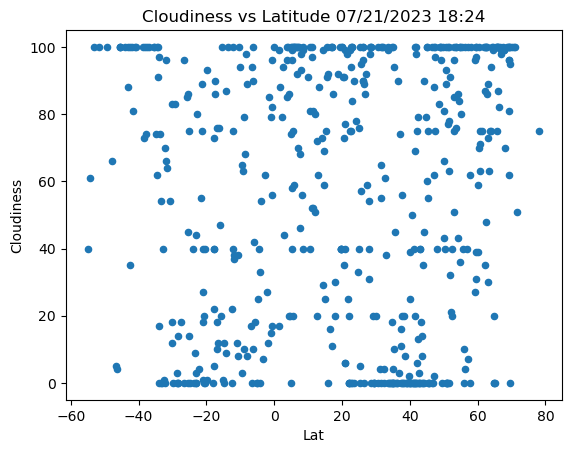

In [9]:
city_data.plot(kind='scatter', x='Lat', y='Cloudiness', title=f'Cloudiness vs Latitude {dt_string}')
plt.savefig('output_data/cloud_vs_lat.png')

## Latitude vs. Wind Speed Plot

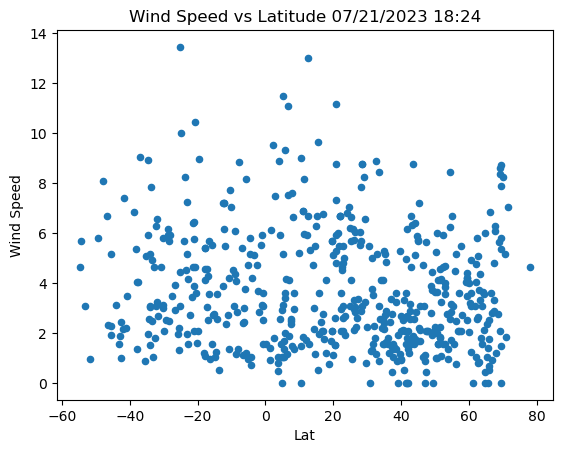

In [10]:
city_data.plot(kind='scatter', x='Lat', y='Wind Speed', title=f'Wind Speed vs Latitude {dt_string}')
plt.savefig('output_data/win_vs_lat.png')

## Linear Regression

In [11]:
# Seperate dataframe into N and S hemispheres
city_data_N = city_data[city_data['Lat'] > 0]
city_data_S = city_data[city_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

/Users/jim/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


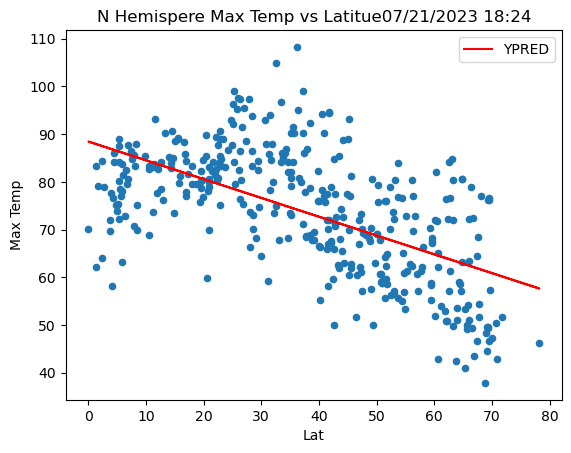

In [12]:
x = city_data_N['Lat'].values.reshape(-1, 1) 
y = city_data_N['Max Temp'].values.reshape(-1, 1)
linear_regressor = LinearRegression().fit(x, y)
city_data_N['YPRED'] = linear_regressor.predict(x)
ax = city_data_N.plot.scatter(x='Lat', y='Max Temp')
city_data_N.plot(x='Lat', y='YPRED', color='red', title=f'N Hemispere Max Temp vs Latitue{dt_string}', ax=ax)
plt.savefig('output_data/N_temp_vs_lat_regress.png')

In [13]:
m = linear_regressor.coef_[0]
b = linear_regressor.intercept_
r2 = r2_score(y, city_data_N['YPRED'])
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)} with a R2 value of {round(r2, 2)}")

The linear equation is: y = -0.39x + 88.46 with a R2 value of 0.35


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

/Users/jim/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


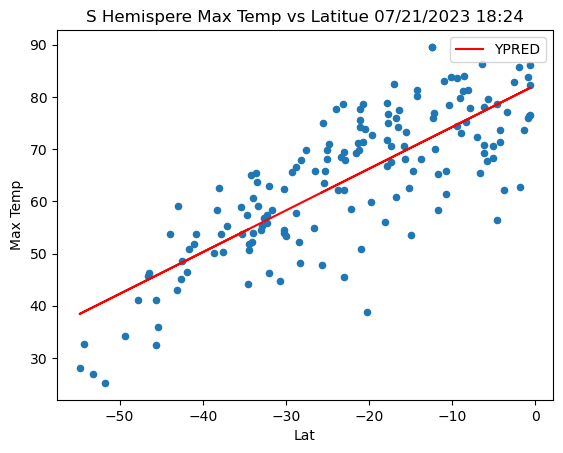

In [14]:
x = city_data_S['Lat'].values.reshape(-1, 1) 
y = city_data_S['Max Temp'].values.reshape(-1, 1)
linear_regressor = LinearRegression().fit(x, y)
city_data_S['YPRED'] = linear_regressor.predict(x)
ax = city_data_S.plot.scatter(x='Lat', y='Max Temp')
city_data_S.plot(x='Lat', y='YPRED', color='red', title=f'S Hemispere Max Temp vs Latitue {dt_string}', ax=ax)
plt.savefig('output_data/S_temp_vs_lat_regress.png')

In [15]:
m = linear_regressor.coef_[0]
b = linear_regressor.intercept_
r2 = r2_score(y, city_data_S['YPRED'])
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)} with a R2 value of {round(r2, 2)}")

The linear equation is: y = 0.8x + 82.25 with a R2 value of 0.63


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

/Users/jim/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


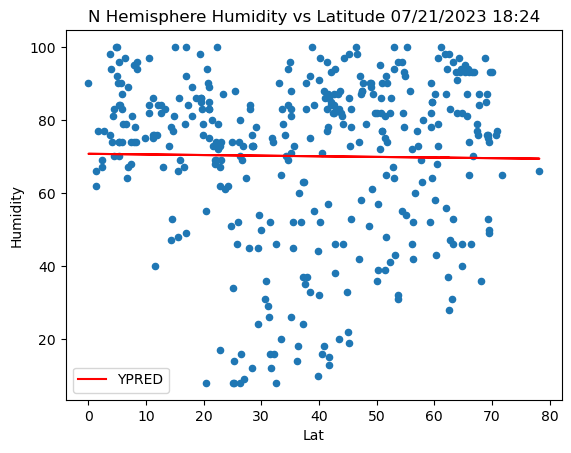

In [16]:
x = city_data_N['Lat'].values.reshape(-1, 1) 
y = city_data_N['Humidity'].values.reshape(-1, 1)
linear_regressor = LinearRegression().fit(x, y)
city_data_N['YPRED'] = linear_regressor.predict(x)
ax = city_data_N.plot.scatter(x='Lat', y='Humidity')
city_data_N.plot(x='Lat', y='YPRED', color='red', title=f'N Hemisphere Humidity vs Latitude {dt_string}', ax=ax)
plt.savefig('output_data/N_humid_vs_lat_regress.png')

In [17]:
m = linear_regressor.coef_[0]
b = linear_regressor.intercept_
r2 = r2_score(y, city_data_N['YPRED'])
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)} with a R2 value of {round(r2, 2)}")

The linear equation is: y = -0.02x + 70.74 with a R2 value of 0.0


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

/Users/jim/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


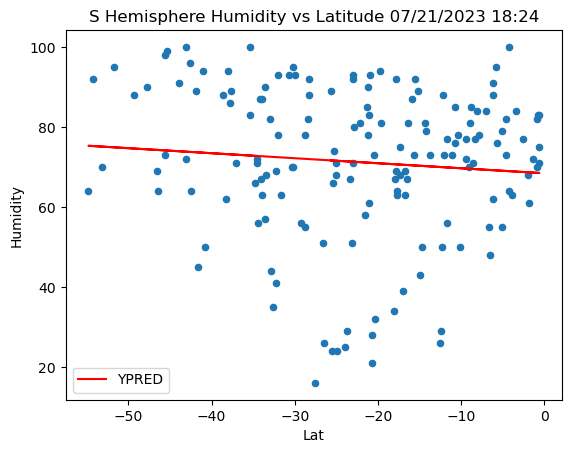

In [18]:
x = city_data_S['Lat'].values.reshape(-1, 1) 
y = city_data_S['Humidity'].values.reshape(-1, 1)
linear_regressor = LinearRegression().fit(x, y)
city_data_S['YPRED'] = linear_regressor.predict(x)
ax = city_data_S.plot.scatter(x='Lat', y='Humidity')
city_data_S.plot(x='Lat', y='YPRED', color='red', title=f'S Hemisphere Humidity vs Latitude {dt_string}', ax=ax,)
plt.savefig('output_data/S_humid_vs_lat_regress.png')

In [19]:
m = linear_regressor.coef_[0]
b = linear_regressor.intercept_
r2 = r2_score(y, city_data_S['YPRED'])
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)} with a R2 value of {round(r2, 2)}")

The linear equation is: y = -0.13x + 68.41 with a R2 value of 0.01


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

/Users/jim/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


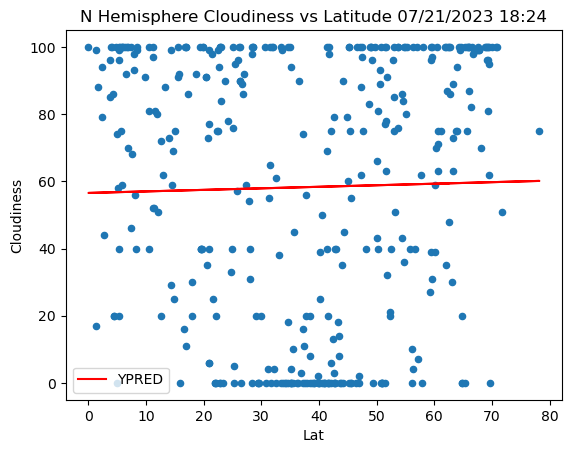

In [20]:
x = city_data_N['Lat'].values.reshape(-1, 1) 
y = city_data_N['Cloudiness'].values.reshape(-1, 1)
linear_regressor = LinearRegression().fit(x, y)
city_data_N['YPRED'] = linear_regressor.predict(x)
ax = city_data_N.plot.scatter(x='Lat', y='Cloudiness')
city_data_N.plot(x='Lat', y='YPRED', color='red', title=f'N Hemisphere Cloudiness vs Latitude {dt_string}', ax=ax)
plt.savefig('output_data/N_cloud_vs_lat_regress.png')

In [21]:
m = linear_regressor.coef_[0]
b = linear_regressor.intercept_
r2 = r2_score(y, city_data_N['YPRED'])
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)} with a R2 value of {round(r2, 2)}")

The linear equation is: y = 0.05x + 56.54 with a R2 value of 0.0


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

/Users/jim/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


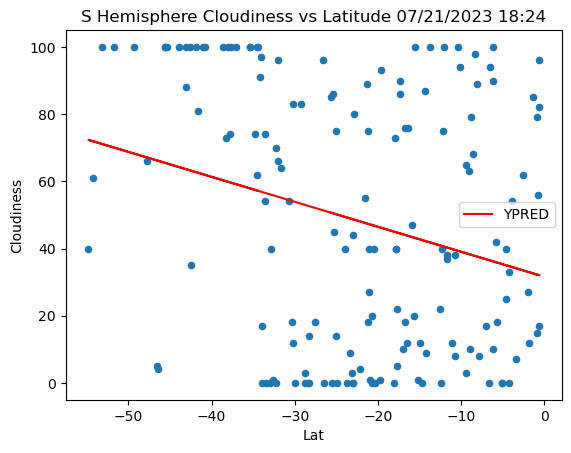

In [22]:
x = city_data_S.loc[:,'Lat'].values.reshape(-1, 1) 
y = city_data_S.loc[:,'Cloudiness'].values.reshape(-1, 1)
linear_regressor = LinearRegression().fit(x, y)
city_data_S.loc[:,'YPRED'] = linear_regressor.predict(x)
ax = city_data_S.plot.scatter(x='Lat', y='Cloudiness')
city_data_S.plot(x='Lat', y='YPRED', color='red', title=f'S Hemisphere Cloudiness vs Latitude {dt_string}', ax=ax)
plt.savefig('output_data/S_cloud_vs_lat_regress.png')

In [23]:
m = linear_regressor.coef_[0]
b = linear_regressor.intercept_
r2 = r2_score(y, city_data_S['YPRED'])
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)} with a R2 value of {round(r2, 2)}")

The linear equation is: y = -0.74x + 31.6 with a R2 value of 0.07


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

/Users/jim/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


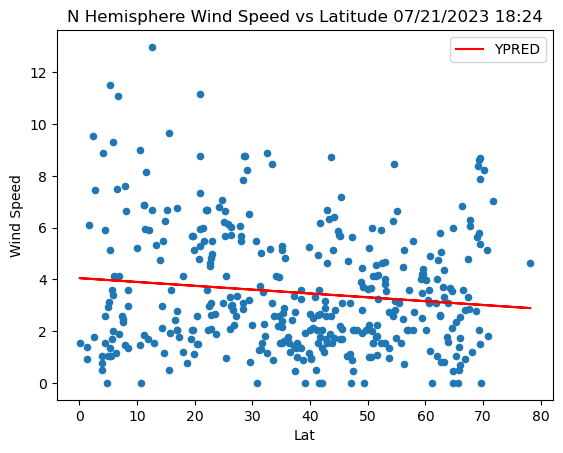

In [24]:
x = city_data_N['Lat'].values.reshape(-1, 1) 
y = city_data_N['Wind Speed'].values.reshape(-1, 1)
linear_regressor = LinearRegression().fit(x, y)
city_data_N['YPRED'] = linear_regressor.predict(x)
ax = city_data_N.plot.scatter(x='Lat', y='Wind Speed')
city_data_N.plot(x='Lat', y='YPRED', color='red', title=f'N Hemisphere Wind Speed vs Latitude {dt_string}', ax=ax)
plt.savefig('output_data/N_wind_vs_lat_regress.png')

In [25]:
m = linear_regressor.coef_[0]
b = linear_regressor.intercept_
r2 = r2_score(y, city_data_N['YPRED'])
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)} with a R2 value of {round(r2, 2)}")

The linear equation is: y = -0.01x + 4.05 with a R2 value of 0.02


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

/Users/jim/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


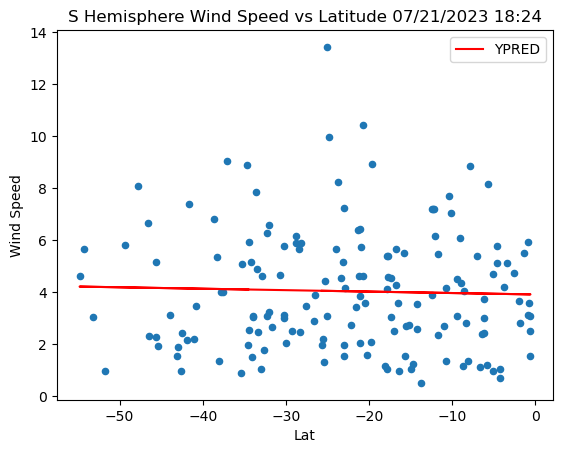

In [26]:
x = city_data_S['Lat'].values.reshape(-1, 1) 
y = city_data_S['Wind Speed'].values.reshape(-1, 1)
linear_regressor = LinearRegression().fit(x, y)
city_data_S['YPRED'] = linear_regressor.predict(x)
ax = city_data_S.plot.scatter(x='Lat', y='Wind Speed')
city_data_S.plot(x='Lat', y='YPRED', color='red', title=f'S Hemisphere Wind Speed vs Latitude {dt_string}', ax=ax)
plt.savefig('output_data/S_wind_vs_lat_regress.png')

In [27]:
m = linear_regressor.coef_[0]
b = linear_regressor.intercept_
r2 = r2_score(y, city_data_S['YPRED'])
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)} with a R2 value of {round(r2, 2)}")

The linear equation is: y = -0.01x + 3.91 with a R2 value of 0.0
